In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [11]:
train=pd.read_csv("train_datset.csv")
test=pd.read_csv("test_dataset.csv")

In [12]:
print(train.shape)
print(test.shape)

(500, 4)
(299, 3)


In [13]:
train.head()

,message,fingers,tail,species
0,pluvia arbor aquos,4,no,Aquari
1,cosmix xeno nebuz odbitaz,5,yes,Zorblax
2,solarix glixx novum galaxum quasar,5,yes,Zorblax
3,arbor insectus pesros ekos dootix nimbus,2,yes,Florian
4,mermax drakos lorix epikoz deftax,4,no,Faerix


In [14]:
test.head()

,message,fingers,tail
0,iephyr terram nimbus terram faunar foliar,2,no
1,joyzor uleex luvium caloox shockus blissae,4,yes
2,aquos arbor ventuc,4,yes
3,nympha nympha epikoz nympha mythox mythox mythox,3,no
4,diitax sibenix fabulon,4,yes


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  500 non-null    object
 1   fingers  500 non-null    int64 
 2   tail     500 non-null    object
 3   species  500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  299 non-null    object
 1   fingers  299 non-null    int64 
 2   tail     299 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.1+ KB


In [17]:
train['fingers'].unique()

array([4, 5, 2, 3, 6, 7, 1, 8, 0, 9], dtype=int64)

In [18]:
train['tail'].unique()

array(['no', 'yes'], dtype=object)

In [19]:
train['species'].unique()

array(['Aquari', 'Zorblax', 'Florian', 'Faerix', 'Nexoon', 'Mythron',
       'Emotivor', 'Sentire', 'Quixnar', 'Cybex'], dtype=object)

In [20]:
train['species'].value_counts()

species
Quixnar     60
Cybex       55
Emotivor    54
Florian     52
Zorblax     51
Mythron     50
Aquari      48
Sentire     44
Faerix      43
Nexoon      43
Name: count, dtype: int64

In [21]:
train['tail'].value_counts()

tail
no     252
yes    248
Name: count, dtype: int64

In [22]:
train['fingers'].value_counts()

fingers
4    96
5    94
3    92
2    80
1    52
6    49
7    17
8    10
0     9
9     1
Name: count, dtype: int64

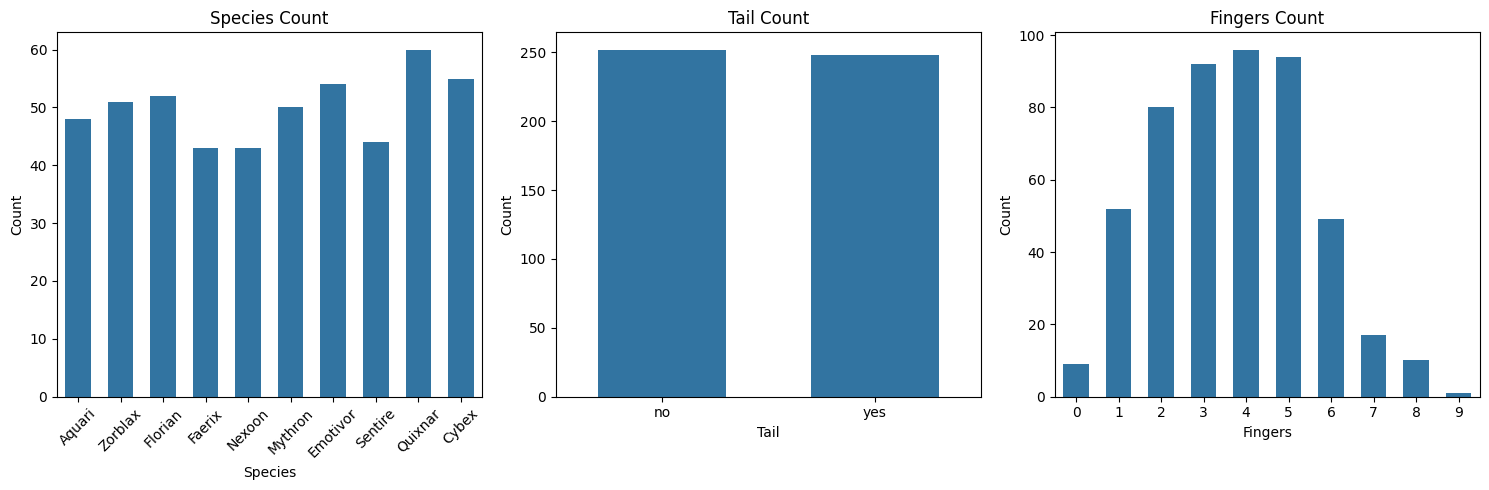

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='species', data=train, ax=axs[0], width=0.6)
axs[0].set_title('Species Count')
axs[0].set_xlabel('Species')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)  

sns.countplot(x='tail', data=train, ax=axs[1], width=0.6)
axs[1].set_title('Tail Count')
axs[1].set_xlabel('Tail')
axs[1].set_ylabel('Count')

sns.countplot(x='fingers', data=train, ax=axs[2], width=0.6)
axs[2].set_title('Fingers Count')
axs[2].set_xlabel('Fingers')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
train['tail'] = label_encoder.fit_transform(train['tail'])
test['tail'] = label_encoder.fit_transform(test['tail'])

In [25]:
train.head()

,message,fingers,tail,species
0,pluvia arbor aquos,4,0,Aquari
1,cosmix xeno nebuz odbitaz,5,1,Zorblax
2,solarix glixx novum galaxum quasar,5,1,Zorblax
3,arbor insectus pesros ekos dootix nimbus,2,1,Florian
4,mermax drakos lorix epikoz deftax,4,0,Faerix


In [26]:
test.head()

,message,fingers,tail
0,iephyr terram nimbus terram faunar foliar,2,0
1,joyzor uleex luvium caloox shockus blissae,4,1
2,aquos arbor ventuc,4,1
3,nympha nympha epikoz nympha mythox mythox mythox,3,0
4,diitax sibenix fabulon,4,1


In [27]:
arr= np.array(train['message'])
print(arr)

['pluvia arbor aquos' 'cosmix xeno nebuz odbitaz'
 'solarix glixx novum galaxum quasar'
 'arbor insectus pesros ekos dootix nimbus'
 'mermax drakos lorix epikoz deftax'
 'synapz algorix cryptoz digitvon algorix quantix robonix'
 'datax quantaz cryptoz cybron quantix nanozom cryptoz neuraz'
 'legax fenix herox sagaq' 'dredax ragex empathix anxius'
 'joyzor ragex sadix angxtix dredax ekstax shamex awezom'
 'anxius ragex shockus furio zenox empathix dredax zenox'
 'gleex empathix calmox luvium furio'
 'nanozom crypooz aeon lazeron techix codex tkchnos nanozom'
 'zephyr nimbus faunar foliar' 'circux lazeron neuraz quaztaz cryptoz'
 'deitax lorix goblax epikoz fenix titanos' 'ventus seepod fsunar sporzom'
 'gaiax arbor faunar insectus' 'lazeron nexhs cryptoz quantix circum'
 'biomar floraz faunar'
 'shamex blissam fearix luvium pridius pridius ghamex blissam'
 'xeno stardux novtm xeno kometa celestar' 'quantaz algorix dronix nexus'
 'solux terranix faunar rootix pollex pluvia gaiax foliar'


In [28]:
split_sentences = np.array([[word] for sentence in arr for word in sentence.split()]).flatten()
unique=set(split_sentences) 

In [29]:
len(unique)

636

In [30]:
message_arrays = train.groupby('species')['message'].apply(lambda x: sum(x.str.split().tolist(), []))
for species, words in message_arrays.items():
     exec(f"{species} =np.array({words})")

In [31]:
array_names = ['Aquari', 'Zorblax', 'Florian', 'Faerix', 'Nexoon', 'Mythron',
       'Emotivor', 'Sentire', 'Quixnar', 'Cybex']
unique_word_count = {}

for array_name in array_names:
    array = globals()[array_name]
    unique_count = len(set(array))
    unique_word_count[array_name] = unique_count

print(unique_word_count)



{'Aquari': 66, 'Zorblax': 82, 'Florian': 76, 'Faerix': 72, 'Nexoon': 70, 'Mythron': 81, 'Emotivor': 78, 'Sentire': 77, 'Quixnar': 88, 'Cybex': 77}


In [32]:
array_names = ['Aquari', 'Zorblax', 'Florian', 'Faerix', 'Nexoon', 'Mythron',
       'Emotivor', 'Sentire', 'Quixnar', 'Cybex']

arrays=[Aquari, Zorblax,Florian, Faerix, Nexoon, Mythron,
       Emotivor, Sentire, Quixnar, Cybex]

for i in range(len(arrays)):
    for j in range(i + 1, len(arrays)):
        
        common_elements = set(arrays[i]).intersection(arrays[j])
        
        if common_elements:
            print(f"{array_names[i]} and {array_names[j]} have common elements: {common_elements}")
            print(" ")

Aquari and Florian have common elements: {'foliar', 'solux', 'ekos', 'nimbus', 'leafon', 'aquos', 'pluvia', 'pollex', 'petros', 'haunar', 'aviana', 'ventus', 'arbor', 'seypod', 'zephyr', 'floren', 'rootix', 'faunar', 'sporzom', 'floran', 'insectus', 'herba', 'gaiax', 'biomar', 'terram', 'ariana', 'floraz', 'seepod', 'terranix'}
 
Zorblax and Quixnar have common elements: {'astron', 'pulsar', 'ufox', 'lunox', 'meteorn', 'pulsox', 'novara', 'warpz', 'blapoz', 'novum', 'kometa', 'nebuz', 'quasar', 'vortex', 'stardux', 'glixx', 'orbitaz', 'celestar', 'zorp', 'galaxum', 'nebulax', 'kkmeta', 'cosmix', 'solarix', 'novax', 'xeno'}
 
Faerix and Mythron have common elements: {'cyclopix', 'mythox', 'fabulon', 'goblax', 'relikum', 'nympha', 'lorix', 'herox', 'unikor', 'magix', 'mermax', 'faerix', 'fenix', 'beastix', 'deitax', 'legax', 'sagax', 'krakos', 'centarex', 'sirenix', 'titanos', 'elvex', 'epikoz', 'drakos', 'gryphox'}
 
Nexoon and Cybex have common elements: {'lazeron', 'dronix', 'robonix'

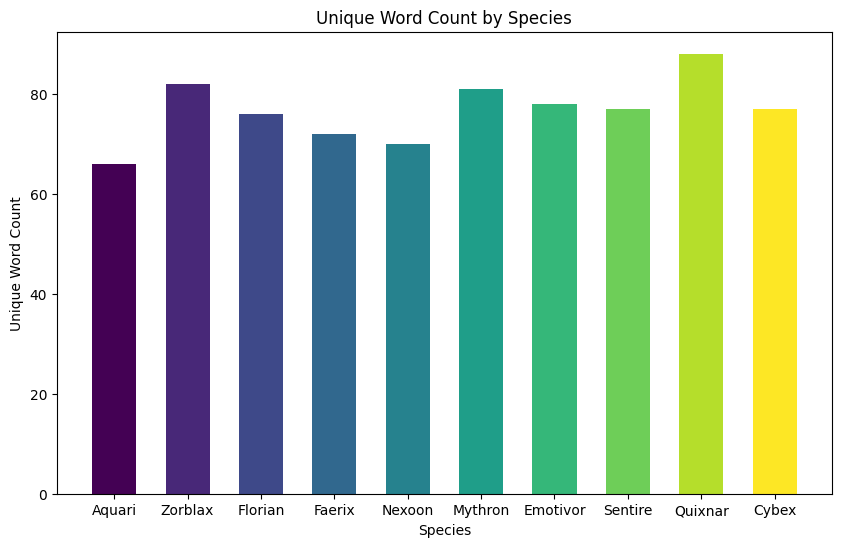

In [33]:
species = list(unique_word_count.keys())
unique_counts = list(unique_word_count.values())

plt.figure(figsize=(10, 6)) 
colors = plt.cm.viridis(np.linspace(0, 1, len(species)))
plt.bar(species, unique_counts, color=colors, width=0.6)

plt.xlabel('Species')
plt.ylabel('Unique Word Count')
plt.title('Unique Word Count by Species')

plt.show()

In [34]:
array_names = ['Aquari', 'Zorblax', 'Florian', 'Faerix', 'Nexoon', 'Mythron',
       'Emotivor', 'Sentire', 'Quixnar', 'Cybex']
arrays=[Aquari, Zorblax,Florian, Faerix, Nexoon, Mythron,
       Emotivor, Sentire, Quixnar, Cybex]
common_counts = defaultdict(int)

for i in range(len(arrays)):
    for j in range(i + 1, len(arrays)):
        common_elements = set(arrays[i]).intersection(arrays[j])
        
        if common_elements:
            count = len(common_elements)
            # Create a combined name for the species
            combined_name = f"{array_names[i]} & {array_names[j]}"
            common_counts[combined_name] = count

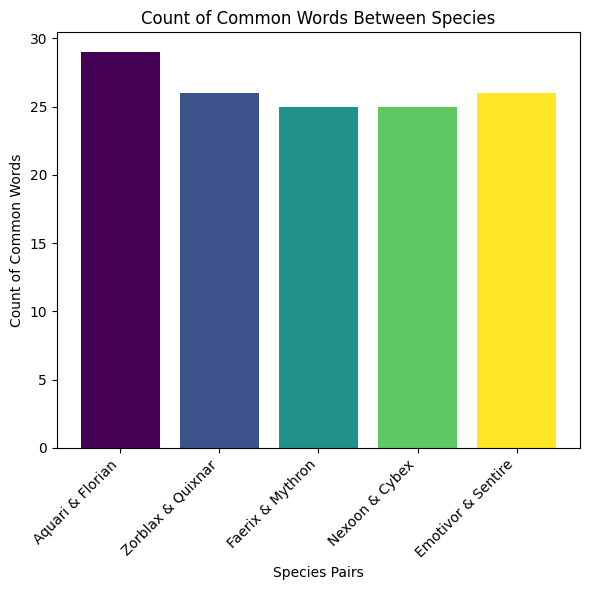

In [35]:
species = list(common_counts.keys())
counts = list(common_counts.values())

plt.figure(figsize=(6, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(species)))
plt.bar(species, counts, color=colors)

plt.xlabel('Species Pairs')
plt.ylabel('Count of Common Words')
plt.title('Count of Common Words Between Species')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

In [36]:
print(species)
print(" ")
print(counts)

['Aquari & Florian', 'Zorblax & Quixnar', 'Faerix & Mythron', 'Nexoon & Cybex', 'Emotivor & Sentire']
 
[29, 26, 25, 25, 26]


Test Started

In [37]:
split_sentences = np.array([[word] for sentence in arr for word in sentence.split()]).flatten()
unique=set(split_sentences) 
len(unique)

636

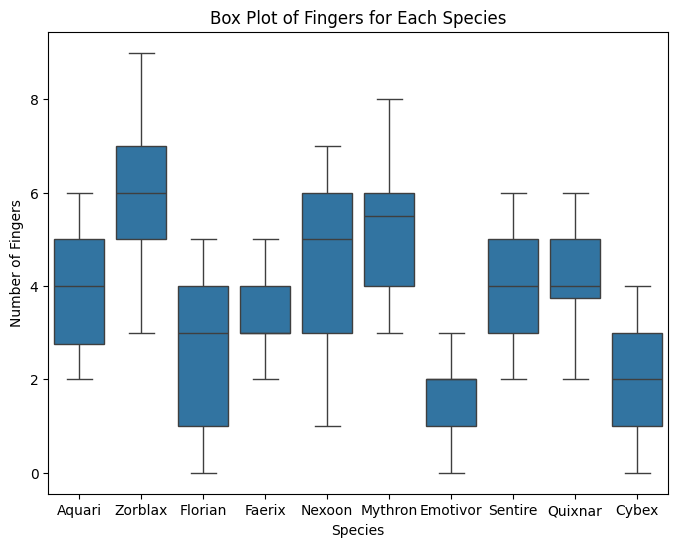

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='fingers', data=train)
plt.title('Box Plot of Fingers for Each Species')
plt.xlabel('Species')
plt.ylabel('Number of Fingers')
plt.show()

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(train['message'])
tfidf_array = tfidf_matrix.toarray()

In [40]:
tfidf_array.shape

(500, 636)

In [41]:
fingers = train['fingers'].values  
tail = train['tail'].values        
tfidf_array= np.column_stack((tfidf_array, fingers))
tfidf_array= np.column_stack((tfidf_array, tail))
tfidf_array.shape

(500, 638)

In [42]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

y= encoder.fit_transform(train['species'])

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(tfidf_array,y,test_size=0.2, random_state=42)

In [44]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.80


In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt


precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Precision: 0.81
Recall: 0.80
F1-Score: 0.80

Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.86      1.00      0.92        12
           2       0.80      1.00      0.89         8
           3       0.92      0.79      0.85        14
           4       0.88      0.78      0.82         9
           5       0.90      0.90      0.90        10
           6       0.60      0.86      0.71         7
           7       0.69      0.64      0.67        14
           8       1.00      0.78      0.88         9
           9       0.73      0.62      0.67        13

    accuracy                           0.80       100
   macro avg       0.80      0.81      0.80       100
weighted avg       0.81      0.80      0.80       100



In [46]:
y_pred_proba = xgb_model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')

print(f'AUC: {auc:.2f}')

AUC: 0.97


In [47]:
tfidf_test_matrix = tfidf.transform(test['message'])
tfidf_array = tfidf_test_matrix.toarray()

In [48]:
tfidf_array.shape

(299, 636)

In [49]:
fingers = test['fingers'].values  
tail = test['tail'].values        
tfidf_array= np.column_stack((tfidf_array, fingers))
tfidf_array= np.column_stack((tfidf_array, tail))
tfidf_array.shape

(299, 638)

In [50]:
y_pred_encoded = xgb_model.predict(tfidf_array)
y_pred_species = encoder.inverse_transform(y_pred_encoded)
results = pd.DataFrame({'species': y_pred_species})

results.to_csv('result.csv', index=False)

print("Predictions saved to result.csv")


Predictions saved to result.csv


In [51]:
df=pd.read_csv("result.csv")

In [52]:
df.head()

,species
0,Aquari
1,Sentire
2,Florian
3,Mythron
4,Mythron


In [53]:
df.shape

(299, 1)